In [1]:
import functions
import algorithms 
import optSolver
import collections
import numpy as np
import seaborn as sns
import scipy.io as sio 
import matplotlib.pyplot as plt

In [2]:
## Define three class objects required in 'optSolver' and their attributes 

class Problem:
    def __init__(self, name, x0, data, compute_f, compute_g, pred_func):
        self.name = name
        self.x0 = x0
        self.X_train = data['X_train']
        self.y_train = data['y_train']
        self.X_test = data['X_test']
        self.y_test = data['y_test']

        self.compute_f = compute_f
        self.compute_g = compute_g
        self.pred_func = pred_func
        
class Method:
    def __init__(self, name, options_map):
        self.name = name
        class options:
            def __init__(self, options_map):
                for attr in options_map.keys():
                    setattr(self, attr, options_map[attr])
        self.options = options(options_map)
        
class Options:
    def __init__(self, num_epoch = 20):
        self.num_epoch = num_epoch

# Problem

## Austrian Credit Card Problem

In [3]:
# Linear Least Square 
data = sio.loadmat('../../data/australian.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('australian_LS', x0, data, 
                  functions.least_square_func,
                  functions.least_square_grad,
                  functions.least_square_pred)
f_star = sio.loadmat('../../data/f_star_LS_australian.mat')['f_star']

In [98]:
# Logistic regression
data = sio.loadmat('../../data/australian.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('australian_LR', x0, data, 
                  functions.logistic_func,
                  functions.logistic_grad,
                  functions.logistic_pred)
f_star = sio.loadmat('../../data/f_star_LR_australian.mat')['f_star']

## Edible Mushroom

In [39]:
# Linear Least Square 
data = sio.loadmat('../../data/mushroom.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('mushroom_LS', x0, data, 
                  functions.least_square_func,
                  functions.least_square_grad,
                  functions.least_square_pred)
f_star = sio.loadmat('../../data/f_star_LS_mushroom.mat')['f_star']

In [177]:
# Losgistic Regression
data = sio.loadmat('../../data/mushroom.mat')
x0 = np.zeros(data['X_train'].shape[1])
problem = Problem('mushroom_LR', x0, data, 
                  functions.logistic_func,
                  functions.logistic_grad,
                  functions.logistic_pred)
f_star = sio.loadmat('../../data/f_star_LR_mushroom.mat')['f_star']

# Training

## Gradient Descent

In [178]:
GD_options = Options(50)
GD_method = Method('GradientDescent',
                {'alpha_bar': 200, 'c1': 1e-2, 'tau': 0.9})
(x, loss_train_trace_GD, acc_train_trace_GD, 
 loss_test_trace_GD, acc_test_trace_GD)  = optSolver.optSolverML_with_tracker(
    problem, GD_method, GD_options)
(f_star, loss_train_trace_GD[-1], acc_train_trace_GD[-1], 
 loss_test_trace_GD[-1], acc_test_trace_GD[-1])

(array([[6.42046924e-12]]),
 0.012484661372959093,
 0.9989610389610389,
 0.011616213924514167,
 1.0)

## Stochastic Gradient Descent, Constant Step Size

In [179]:
# parameter setting set
SGDC_options = Options(50)
alpha_bar_set = [0.01, 0.05]
batch_size_set = [1, 1]

In [180]:
# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_with_tracker(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)

[[6.42046924e-12]] 0.004448795000236432 1.0 0.004353248620394734 1.0
[[6.42046924e-12]] 0.0009249729640649269 1.0 0.0009777167532296017 1.0


## Stochastic Gradient Descent, Diminishing Step Size

In [181]:
# parameter setting set
SGDD_options = Options(50)
alpha_bar_set = [0.5, 1, 2]
batch_size_set = [1, 1, 1]

In [182]:
# trace set
method_trace_SGDD = []
loss_train_trace_SGDD = []
acc_train_trace_SGDD = []
loss_test_trace_SGDD = []
acc_test_trace_SGDD = []

for alpha_bar, batch_size in zip(alpha_bar_set, batch_size_set):
    # set method
    SGDD_method = Method('StochasticGradient',
                    {'step_type': 'Diminishing', 'alpha_bar': alpha_bar, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_with_tracker(
        problem, SGDD_method, SGDD_options)
    print(f_star, loss_train_trace[-1], acc_train_trace[-1],
          loss_test_trace[-1], acc_test_trace[-1])
    method_trace_SGDD.append(SGDD_method)
    loss_train_trace_SGDD.append(loss_train_trace)
    acc_train_trace_SGDD.append(acc_train_trace)
    loss_test_trace_SGDD.append(loss_test_trace)
    acc_test_trace_SGDD.append(acc_test_trace)

[[6.42046924e-12]] 0.24608481445563615 0.9057142857142857 0.23624223733907743 0.9236363636363636
[[6.42046924e-12]] 0.17689460652201658 0.9511688311688312 0.1691880190414102 0.9624242424242424
[[6.42046924e-12]] 0.12604568349772277 0.9644155844155844 0.11213582279107896 0.9703030303030303


# Ploting

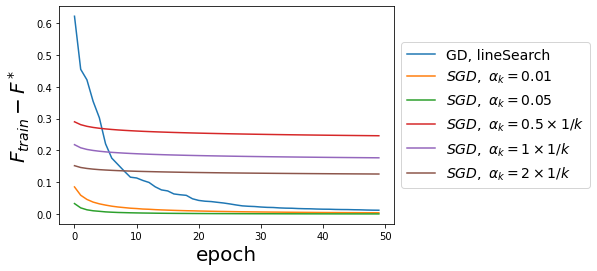

In [183]:
# plot: F_train v.s. F^*
sns.lineplot(x=range(len(loss_train_trace_GD)), 
             y=loss_train_trace_GD - f_star[0],
            label='GD, lineSearch')

for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.savefig('../../report/fig/' + problem.name + '_train_loss', dpi=300,
            bbox_inches='tight')
plt.show()

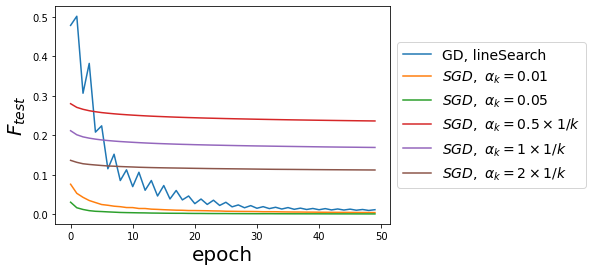

In [184]:
# plot: F_test
sns.lineplot(x=range(len(loss_test_trace_GD)), 
             y=loss_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(loss_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.savefig('../../report/fig/' + problem.name + '_test_loss', dpi=300,
            bbox_inches='tight')
plt.show()

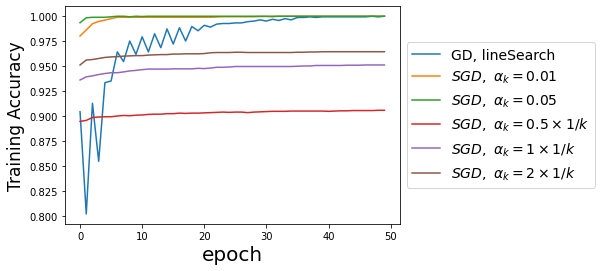

In [185]:
# plot: Training Accuracy
sns.lineplot(x=range(len(acc_train_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_train_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
plt.savefig('../../report/fig/' + problem.name + '_train_acc', dpi=300,
            bbox_inches='tight')
plt.show()

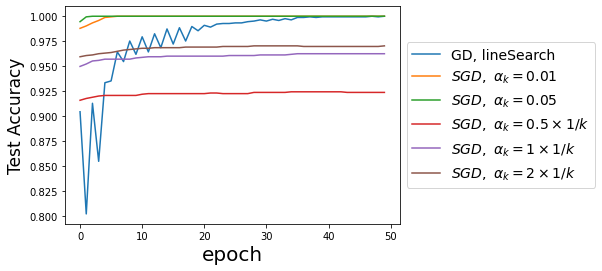

In [186]:
# plot: Test Accuracy
sns.lineplot(x=range(len(acc_test_trace_GD)), 
             y=acc_test_trace_GD,
            label='GD, lineSearch')

for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}$'.format(method.options.alpha_bar))
    
for metric_trace, method in zip(acc_test_trace_SGDD, method_trace_SGDD):
    sns.lineplot(x=range(len(metric_trace)), 
             y=metric_trace,
            label=r'$SGD,\ \alpha_k={}\times 1/k$'.format(method.options.alpha_bar))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
plt.savefig('../../report/fig/' + problem.name + '_test_acc', dpi=300,
            bbox_inches='tight')
plt.show()

## Impact of Batch Size

In [190]:
# parameter setting set
SGDC_options = Options(30)
batch_size_set = [1, 8, 16, 32, 64, 128]

In [191]:
# trace set
method_trace_SGDC = []
loss_train_trace_SGDC = []
acc_train_trace_SGDC = []
loss_test_trace_SGDC = []
acc_test_trace_SGDC = []
for batch_size in batch_size_set:
    # set method
    SGDC_method = Method('StochasticGradient',
                    {'step_type': 'Constant', 'alpha_bar': 1, 
                     'batch_size': batch_size})
    
    (x, loss_train_trace, acc_train_trace, 
    loss_test_trace, acc_test_trace)  = optSolver.optSolverML_with_tracker(
        problem, SGDC_method, SGDC_options)
    print(f_star, 
          loss_train_trace[-1], 
          acc_train_trace[-1],
          loss_test_trace[-1], 
          acc_test_trace[-1]
          )
    method_trace_SGDC.append(SGDC_method)
    loss_train_trace_SGDC.append(loss_train_trace)
    acc_train_trace_SGDC.append(acc_train_trace)
    loss_test_trace_SGDC.append(loss_test_trace)
    acc_test_trace_SGDC.append(acc_test_trace)

[[6.42046924e-12]] 5.0144608349139184e-05 1.0 6.642521385841497e-05 1.0
[[6.42046924e-12]] 0.0006229556337517025 1.0 0.0006566543893281322 1.0
[[6.42046924e-12]] 0.001252945247240059 1.0 0.0012624699475306696 1.0
[[6.42046924e-12]] 0.002420101901311814 1.0 0.0025015826227463562 1.0
[[6.42046924e-12]] 0.004644206512124529 1.0 0.004612667280913007 1.0
[[6.42046924e-12]] 0.00901256327762646 0.9989610389610389 0.008460827952572298 1.0


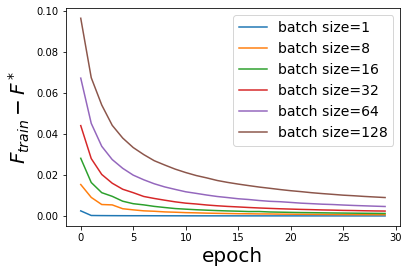

In [192]:
for metric_trace, method in zip(loss_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace - f_star[0],
                 label=r'batch size={}'.format(method.options.batch_size))

plt.ylabel(r'$F_{train} - F^*$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.legend(fontsize=14)
plt.savefig('../../report/fig/' + problem.name + '_train_loss_batch', dpi=300,
            bbox_inches='tight')
plt.show()

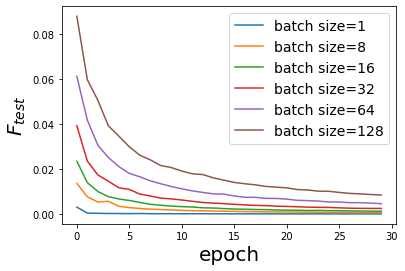

In [193]:
for metric_trace, method in zip(loss_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)),  y=metric_trace,
                 label=r'batch size={}'.format(method.options.batch_size))
    
plt.legend(fontsize=14)
plt.ylabel(r'$F_{test}$', fontsize=20)
plt.xlabel('epoch', fontsize=20)
plt.savefig('../../report/fig/' + problem.name + '_test_loss_batch', dpi=300,
            bbox_inches='tight')
plt.show()

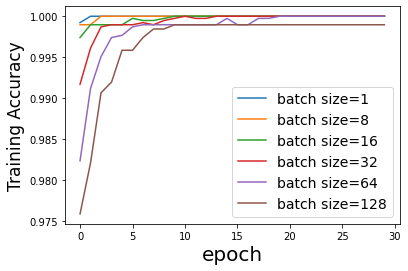

In [194]:
for metric_trace, method in zip(acc_train_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'batch size={}'.format(method.options.batch_size))
    
plt.legend(fontsize=14)
plt.ylabel('Training Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
plt.savefig('../../report/fig/' + problem.name + '_train_acc_batch', dpi=300,
            bbox_inches='tight')
plt.show()

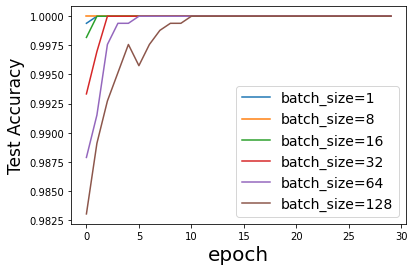

In [195]:
for metric_trace, method in zip(acc_test_trace_SGDC, method_trace_SGDC):
    sns.lineplot(x=range(len(metric_trace)), y=metric_trace,
                 label=r'batch_size={}'.format(method.options.batch_size))

plt.legend(fontsize=14)
plt.ylabel('Test Accuracy', fontsize=17)
plt.xlabel('epoch', fontsize=20)
plt.savefig('../../report/fig/' + problem.name + '_test_acc_batch', dpi=300,
            bbox_inches='tight')
plt.show()